## Importing the necessary libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Stage 1

In [101]:
df = pd.read_excel("data/wgidataset.xlsx", sheet_name='ControlofCorruption', skiprows=range(12))

years_row = df.iloc[0]
codes_row = df.iloc[1]

column_names = (['Country', 'Code'] + [f'{code}_{year}' for code, year in zip(codes_row[2:], years_row[2:])])

df.columns = column_names
df = df.drop([0, 1]).reset_index(drop=True)

DF_WGI = df.copy()

In [102]:
DF_WGI

,Country,Code,Estimate_1996,StdErr_1996,NumSrc_1996,Rank_1996,Lower_1996,Upper_1996,Estimate_1998,StdErr_1998,...,NumSrc_2021,Rank_2021,Lower_2021,Upper_2021,Estimate_2022,StdErr_2022,NumSrc_2022,Rank_2022,Lower_2022,Upper_2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,78.571426,62.857143,89.047623,0.756785,0.31725,2,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1,87.096771,72.043015,96.774193,1.334759,0.453149,...,1,88.571426,70,96.666664,1.270204,0.463415,1,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2,4.301075,0,27.419355,-1.176012,0.324013,...,8,12.380953,4.761905,20.952381,-1.183776,0.17332,8,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4,9.67742,0.537634,27.419355,-1.180451,0.227055,...,10,29.047619,19.523809,40.476189,-0.601941,0.160003,10,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,73.333336,50.952381,89.047623,1.270204,0.463415,1,88.679245,68.396225,97.169815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,-1.140072,0.262077,4,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9,35.714287,26.190475,48.095238,-0.456188,0.15803,9,35.377357,24.528301,48.113209
210,South Africa,ZAF,0.732927,0.210325,6,76.344086,66.129036,81.182793,0.638809,0.188628,...,11,53.809525,46.190475,60,-0.319765,0.157883,11,44.811321,31.603773,52.35849
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3,0,0,12.365591,-1.416679,0.310343,...,11,4.285714,0,6.666667,-1.544474,0.149016,12,3.301887,0.471698,7.075472
212,Zambia,ZMB,-0.840641,0.262077,4,24.731182,5.913979,41.39785,-0.853156,0.227055,...,12,25.714285,17.619047,33.809525,-0.5292,0.152557,12,34.433964,23.584906,45.754719


In [103]:
DF_SORTED = DF_WGI.sort_index(ascending=False)

In [104]:
DF_SORTED

,Country,Code,Estimate_1996,StdErr_1996,NumSrc_1996,Rank_1996,Lower_1996,Upper_1996,Estimate_1998,StdErr_1998,...,NumSrc_2021,Rank_2021,Lower_2021,Upper_2021,Estimate_2022,StdErr_2022,NumSrc_2022,Rank_2022,Lower_2022,Upper_2022
213,Zimbabwe,ZWE,-0.278847,0.244907,5,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12,10,4.285714,17.619047,-1.255139,0.151262,12,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4,24.731182,5.913979,41.39785,-0.853156,0.227055,...,12,25.714285,17.619047,33.809525,-0.5292,0.152557,12,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3,0,0,12.365591,-1.416679,0.310343,...,11,4.285714,0,6.666667,-1.544474,0.149016,12,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6,76.344086,66.129036,81.182793,0.638809,0.188628,...,11,53.809525,46.190475,60,-0.319765,0.157883,11,44.811321,31.603773,52.35849
209,Serbia,SRB,-1.140072,0.262077,4,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9,35.714287,26.190475,48.095238,-0.456188,0.15803,9,35.377357,24.528301,48.113209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,73.333336,50.952381,89.047623,1.270204,0.463415,1,88.679245,68.396225,97.169815
3,Angola,AGO,-1.167702,0.262077,4,9.67742,0.537634,27.419355,-1.180451,0.227055,...,10,29.047619,19.523809,40.476189,-0.601941,0.160003,10,30.660378,21.226416,43.396225
2,Afghanistan,AFG,-1.291705,0.340507,2,4.301075,0,27.419355,-1.176012,0.324013,...,8,12.380953,4.761905,20.952381,-1.183776,0.17332,8,12.264151,4.716981,20.283018
1,Andorra,ADO,1.318143,0.480889,1,87.096771,72.043015,96.774193,1.334759,0.453149,...,1,88.571426,70,96.666664,1.270204,0.463415,1,88.679245,68.396225,97.169815


## Stage 2

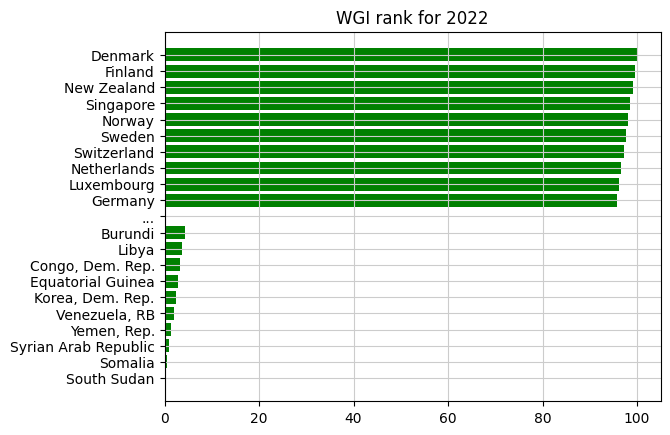

In [105]:
sorted_data_frame = DF_SORTED.sort_values('Rank_2022', ascending=True)

top_countries = sorted_data_frame.head(10)[['Country', 'Rank_2022']]
bottom_countries = sorted_data_frame.iloc[203:213][['Country', 'Rank_2022']]

some_countries = top_countries['Country'].tolist() + ['...'] + bottom_countries['Country'].tolist()
some_values = top_countries['Rank_2022'].tolist() + [0] + bottom_countries['Rank_2022'].tolist()

index = np.arange(len(some_countries))

plt.barh(index, some_values, color='green')
plt.yticks(index, some_countries)
plt.title('WGI rank for 2022')
plt.grid(color='0.8')
plt.show()

**The graph shows that European countries dominate the top rankings, particularly from Western and Northern Europe, while countries with the lowest WGI ranks are predominantly located in Africa.**

## Stage 3

In [106]:
region_data_frame = pd.read_excel("data/regions.xlsx")

merged_data_frame = pd.merge(df, region_data_frame, on=['Code'], how='outer')

DF_REGION = merged_data_frame[merged_data_frame['Region'] == 'ECA']

In [107]:
DF_REGION

,Country_x,Code,Estimate_1996,StdErr_1996,NumSrc_1996,Rank_1996,Lower_1996,Upper_1996,Estimate_1998,StdErr_1998,...,Lower_2021,Upper_2021,Estimate_2022,StdErr_2022,NumSrc_2022,Rank_2022,Lower_2022,Upper_2022,Country_y,Region
5,Albania,ALB,-0.893903,0.315914,3,19.354839,2.688172,43.010754,-0.992025,0.233192,...,21.428572,45.238094,-0.407876,0.15803,9,38.679245,26.886793,50,Albania,ECA
9,Armenia,ARM,-0.473051,0.340507,2,38.172043,15.053763,59.139786,-0.936306,0.233192,...,48.095238,62.857143,0.028035,0.175907,8,56.132076,47.169811,63.207546,Armenia,ECA
14,Azerbaijan,AZE,-1.445619,0.275614,3,2.688172,0,17.204302,-1.289568,0.191027,...,12.857142,33.333332,-1.040572,0.185452,6,16.981133,7.075472,24.528301,Azerbaijan,ECA
23,Bosnia and Herzegovina,BIH,-0.27057,0.275614,3,48.924732,28.494623,60.752689,-0.402136,0.194088,...,18.571428,41.42857,-0.683835,0.171805,8,25.943396,19.811321,39.150944,Bosnia and Herzegovina,ECA
24,Belarus,BLR,-0.389609,0.340507,2,42.473118,17.741936,60.752689,-0.32317,0.233192,...,33.333332,55.238094,-0.579676,0.164842,7,31.603773,21.226416,44.811321,Belarus,ECA
69,Georgia,GEO,-1.527264,0.340507,2,1.075269,0,17.741936,-0.982506,0.238827,...,63.809525,80.476189,0.620238,0.171805,8,72.169815,63.207546,79.71698,Georgia,ECA
98,Kazakhstan,KAZ,-1.13282,0.275614,3,12.365591,0.537634,30.107527,-1.078855,0.191027,...,33.809525,54.285713,-0.185301,0.151206,10,48.584908,37.735847,57.547169,Kazakhstan,ECA
100,Kyrgyz Republic,KGZ,-0.993923,0.340507,2,17.204302,0.537634,39.784946,-1.058797,0.238827,...,5.714286,19.523809,-1.230029,0.155666,11,10.377358,4.716981,19.339622,Kyrgyzstan,ECA
117,Kosovo,KSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.523809,50.952381,-0.263795,0.162349,9,47.169811,33.962265,54.71698,Kosovo,ECA
121,Moldova,MDA,-0.437427,0.275614,3,39.784946,19.354839,57.526882,-0.399806,0.191027,...,26.190475,48.095238,-0.341932,0.163362,8,42.92453,30.188679,51.886791,Moldova,ECA


## Stage 4

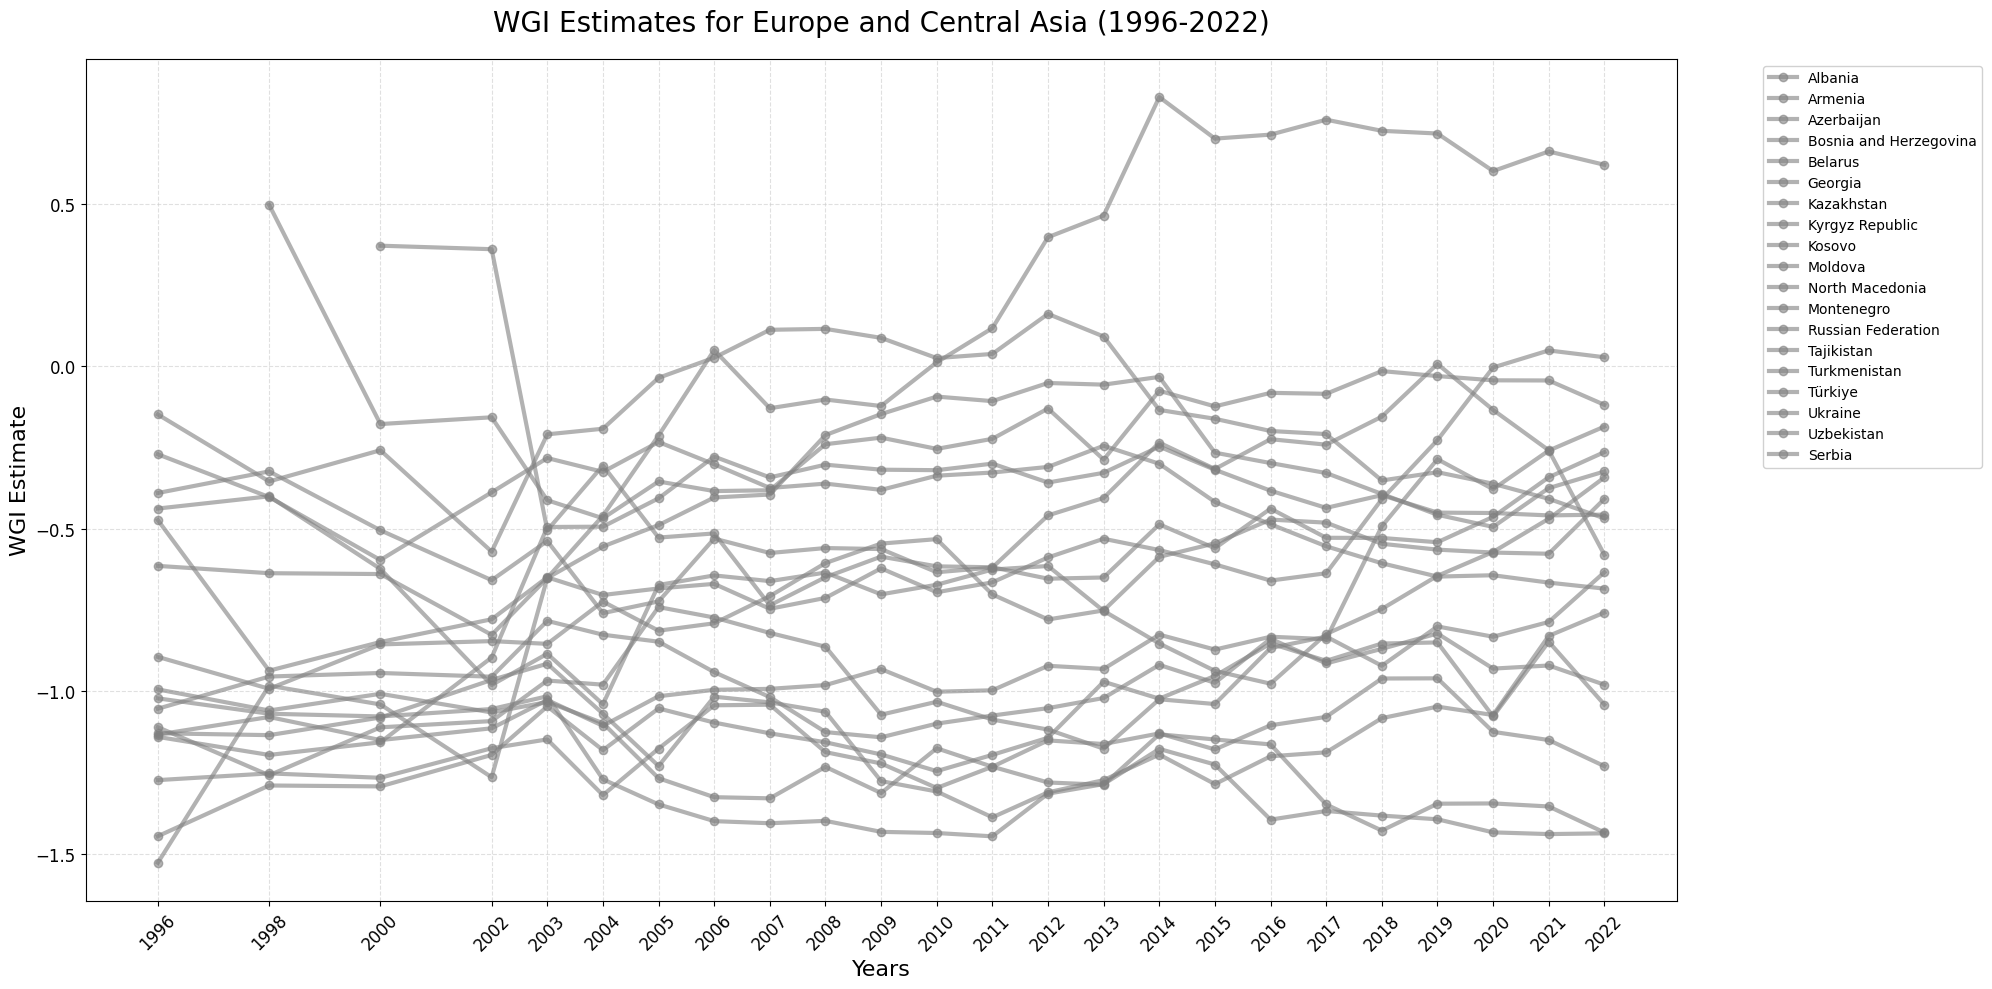

In [108]:
years = list(range(1996, 2023))
years.remove(1997)
years.remove(1999)
years.remove(2001)

estimate_columns = df.filter(like='Estimate').columns
estimate = DF_REGION[estimate_columns].T.values.tolist()
country_names = DF_REGION['Country_x'].tolist()

plt.figure(figsize=(20, 10))

plt.plot(years, estimate, '-o', color='grey', linewidth=3, markersize=6, alpha=0.6, label=country_names)

plt.grid(color='0.8', linestyle='--', alpha=0.6)
plt.xlabel('Years', fontsize=16)
plt.ylabel('WGI Estimate', fontsize=16)
plt.title('WGI Estimates for Europe and Central Asia (1996-2022)', fontsize=20, pad=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, framealpha=0.9)

plt.xticks(years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## Stage 5

In [109]:
DF_MINMAX = pd.DataFrame(DF_REGION[DF_REGION['Estimate_2022'] == min(DF_REGION['Estimate_2022'])])
DF_MINMAX = pd.concat([DF_MINMAX, DF_REGION[DF_REGION['Estimate_2022'] == max(DF_REGION['Estimate_2022'])]], ignore_index=False)

In [110]:
DF_MINMAX

,Country_x,Code,Estimate_1996,StdErr_1996,NumSrc_1996,Rank_1996,Lower_1996,Upper_1996,Estimate_1998,StdErr_1998,...,Lower_2021,Upper_2021,Estimate_2022,StdErr_2022,NumSrc_2022,Rank_2022,Lower_2022,Upper_2022,Country_y,Region
187,Turkmenistan,TKM,-1.021493,0.340507,2,15.591398,0.537634,38.709679,-1.068734,0.238827,...,0.952381,14.761905,-1.436774,0.208912,5,5.660378,0.471698,14.622642,Turkmenistan,ECA
69,Georgia,GEO,-1.527264,0.340507,2,1.075269,0,17.741936,-0.982506,0.238827,...,63.809525,80.476189,0.620238,0.171805,8,72.169815,63.207546,79.71698,Georgia,ECA


## Stage 6

In [111]:
means = DF_REGION[estimate_columns].mean()

S_MEANS = pd.Series(means)

In [112]:
S_MEANS

Estimate_1996   -0.885471
Estimate_1998   -0.823362
Estimate_2000   -0.802862
Estimate_2002   -0.821879
Estimate_2003   -0.740051
Estimate_2004   -0.782648
Estimate_2005   -0.727624
Estimate_2006   -0.685522
Estimate_2007   -0.721019
Estimate_2008   -0.698221
Estimate_2009   -0.720827
Estimate_2010   -0.721366
Estimate_2011   -0.719957
Estimate_2012    -0.66692
Estimate_2013     -0.6607
Estimate_2014   -0.584655
Estimate_2015   -0.643372
Estimate_2016   -0.618599
Estimate_2017   -0.633326
Estimate_2018    -0.60042
Estimate_2019   -0.561316
Estimate_2020   -0.596217
Estimate_2021    -0.55104
Estimate_2022   -0.562725
dtype: object

**Based on this data we can track changes of the average estimate during the specified period.**

## Stage 7

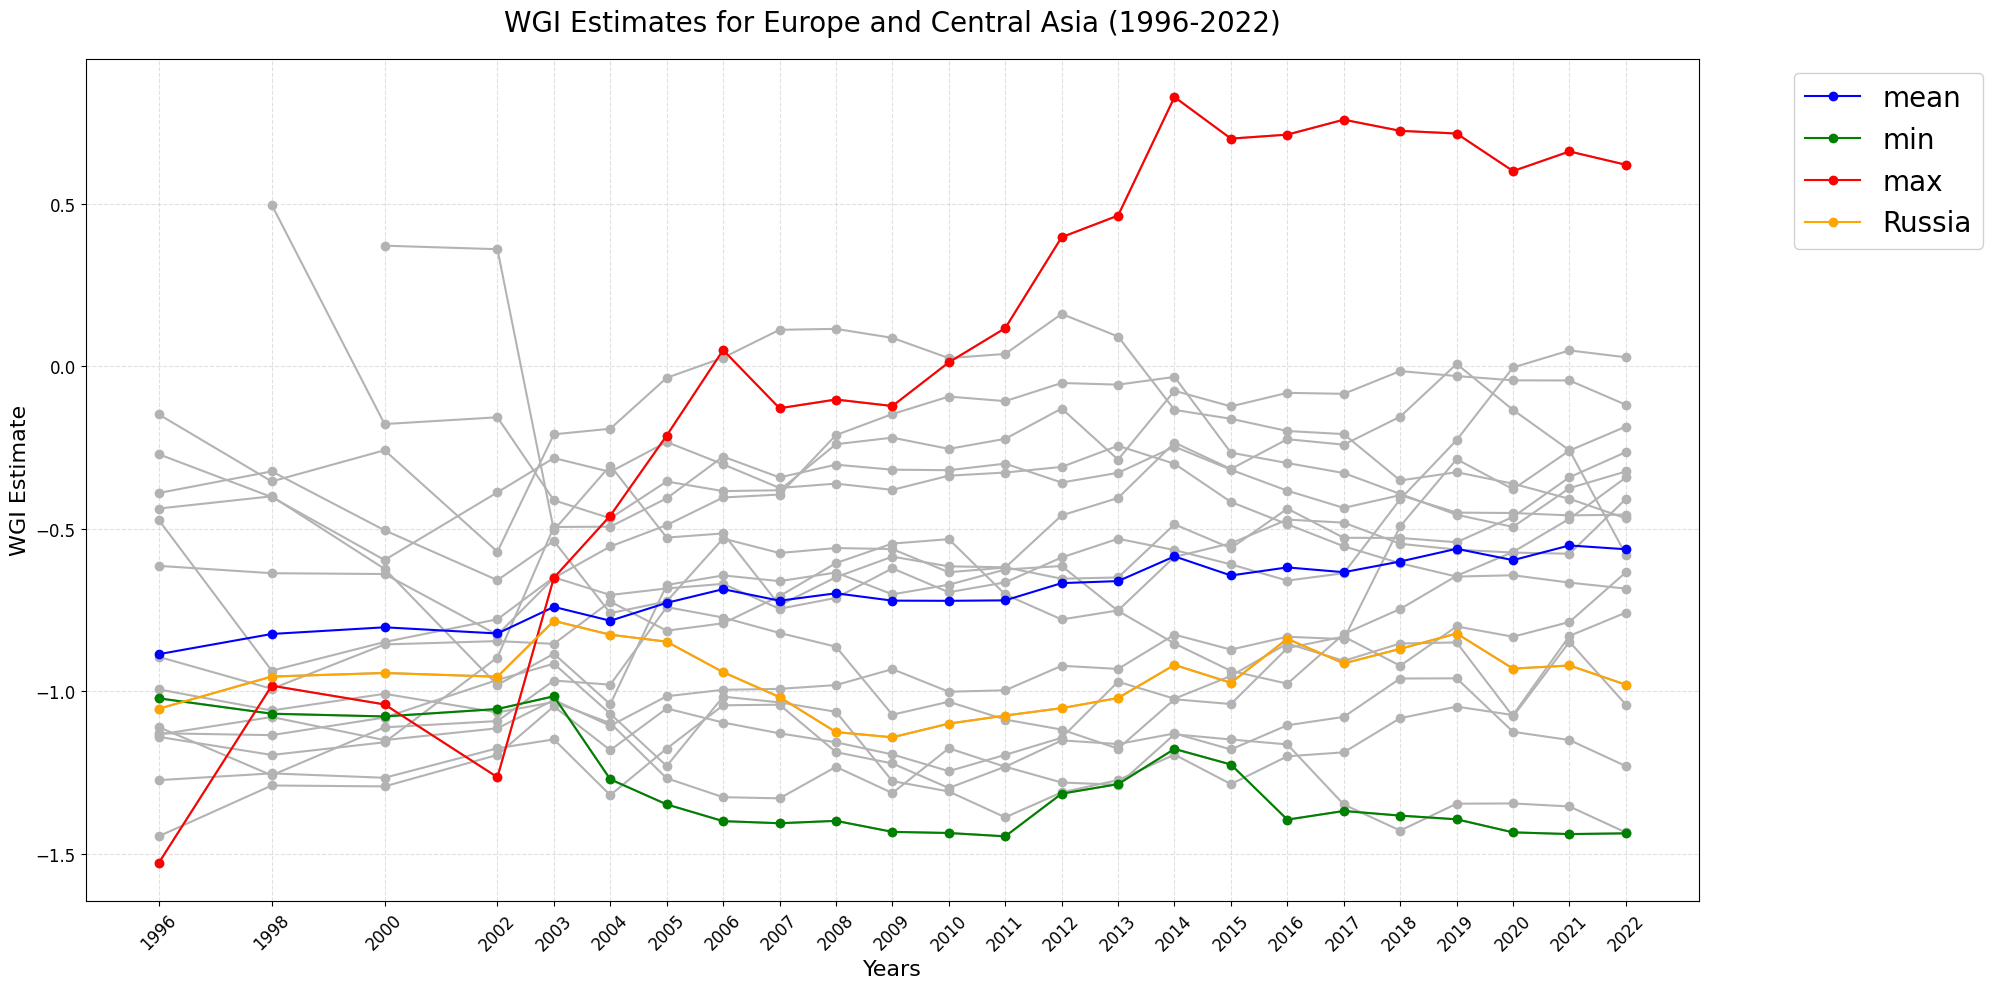

In [113]:
estimate_min = DF_MINMAX[estimate_columns].iloc[0].values.tolist()
estimate_max = DF_MINMAX[estimate_columns].iloc[1].values.tolist()
estimate_rus = DF_REGION[estimate_columns][DF_REGION['Code'] == 'RUS'].iloc[0].values.tolist()

plt.figure(figsize=(20, 10))

plt.plot(years, estimate, '-o', color='0.7')
plt.plot(years, S_MEANS, '-bo', label='mean')
plt.plot(years, estimate_min, '-go', label='min')
plt.plot(years, estimate_max, '-ro', label='max')
plt.plot(years, estimate_rus, '-o', color='orange', label='Russia')

plt.grid(color='0.8', linestyle='--', alpha=0.6)
plt.xlabel('Years', fontsize=16)
plt.ylabel('WGI Estimate', fontsize=16)
plt.title('WGI Estimates for Europe and Central Asia (1996-2022)', fontsize=20, pad=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, framealpha=0.9)

plt.xticks(years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

**The graph shows that during the specified period, the WGI estimate for countries in Europe and Central Asia predominantly increased, as in 1996-2000 most values clustered around -1.25, while in 2020-2022 they were around -0.5. This trend is also evident from the rising average value highlighted in blue. An anomalous surge in one country's index is noticeable. Russia consistently remains below the regional average throughout the entire period.**

## Stage 8

In [114]:
rank_dif = DF_WGI['Rank_2022'] - DF_WGI['Rank_1996']
rank_dif.index = DF_WGI['Country']

In [115]:
rank_dif

Country
Aruba                     NaN
Andorra              1.582474
Afghanistan          7.963075
Angola              20.982958
Anguilla                  NaN
                      ...    
Serbia                23.5494
South Africa       -31.532764
Congo, Dem. Rep.     3.301887
Zambia               9.702782
Zimbabwe           -39.358894
Length: 214, dtype: object

**Based on this data we can track which countries saw their WGI rank decrease (negative values), increase (positive values), or remain relatively unchanged (values close to zero) during the specified period.**

## Stage 9

In [116]:
RES_TABLE = pd.DataFrame({
    'mean_2022': ['ECA', '-', DF_REGION['Rank_1996'].mean(), DF_REGION['Rank_2022'].mean(),
                  DF_REGION['Rank_2022'].mean() - DF_REGION['Rank_1996'].mean()],

    'max_2022': ['ECA', DF_REGION.loc[DF_REGION['Rank_2022'].idxmax(), 'Country_x'], 
                DF_REGION.loc[DF_REGION['Rank_2022'].idxmax(), 'Rank_1996'], 
                DF_REGION['Rank_2022'].max(),
                DF_REGION['Rank_2022'].max() - DF_REGION.loc[DF_REGION['Rank_2022'].idxmax(), 'Rank_1996']],

    'min_2022': ['ECA', DF_REGION.loc[DF_REGION['Rank_2022'].idxmin(), 'Country_x'],
                DF_REGION.loc[DF_REGION['Rank_2022'].idxmin(), 'Rank_1996'],
                DF_REGION['Rank_2022'].min(),
                DF_REGION['Rank_2022'].min() - DF_REGION.loc[DF_REGION['Rank_2022'].idxmin(), 'Rank_1996']],

    'Russia_2022': ['ECA', DF_WGI.loc[DF_WGI['Code'] == 'RUS', 'Country'].values[0],
                  DF_WGI.loc[DF_WGI['Code'] == 'RUS', 'Rank_1996'].values[0],
                  DF_WGI.loc[DF_WGI['Code'] == 'RUS', 'Rank_2022'].values[0],
                  DF_WGI.loc[DF_WGI['Code'] == 'RUS', 'Rank_2022'].values[0] - DF_WGI.loc[DF_WGI['Code'] == 'RUS', 'Rank_1996'].values[0]]
}, index=['Region', 'Country', 'Rank 1996', 'Rank 2022', 'Difference']).T

In [117]:
RES_TABLE

,Region,Country,Rank 1996,Rank 2022,Difference
mean_2022,ECA,-,22.390892,33.714002,11.32311
max_2022,ECA,Georgia,1.075269,72.169815,71.094546
min_2022,ECA,Turkmenistan,15.591398,5.660378,-9.931021
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


**Based on the obtained table, it can be concluded that the average WGI rank value in Europe and Central Asia has increased by 1.5 times since 1996. It is also noticeable that Georgia experienced a sharp increase in rank value (almost 70-fold). For the country with the lowest rank in 2022, negative growth is observed throughout the entire period. Russia is increasing its WGI rank value, but at a slow pace.**

## Stage 10

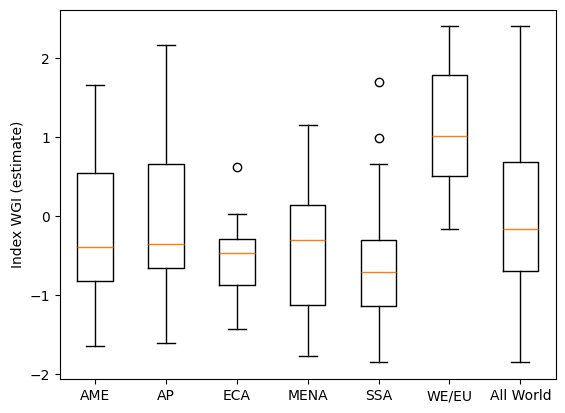

In [118]:
region_groups = merged_data_frame.groupby('Region')['Estimate_2022'].apply(lambda x: x.dropna().tolist())

result_data = region_groups.tolist() + [DF_WGI['Estimate_2022'].dropna().tolist()]

plt.boxplot(result_data)
plt.xticks(range(1, len(result_data) + 1), [*region_groups.index.tolist(), 'All World'])
plt.ylabel('Index WGI (estimate)')
plt.show()

The graph allows us to draw the following conclusions:
1.	Western Europe / European Union (WE/EU):
 - The mean (median) WGI index value is higher than all other regions and above the global average.
 - Most countries in this region have high WGI scores, indicating superior governance quality compared to other regions.
 - The value spread (interquartile range) is relatively wide, but nearly all countries show positive index values.
2.	Sub-Saharan Africa (SSA), Eastern Europe and Central Asia (ECA), Middle East and North Africa (MENA):
 - Median WGI indices in these regions are negative, reflecting lower governance quality.
 - Particularly low values and a narrow range are observed in ECA. SSA and MENA show numerous outliers and wide whiskers, highlighting significant intra-regional heterogeneity.
3.	Americas (AME) and Asia-Pacific (AP):
 - Median values hover near zero, with a broad value range encompassing both positive and negative indices.
 - This suggests stark governance quality disparities among countries within these regions.
4.	Global Average (All World):
 - The median WGI is slightly below zero, implying that most countries globally fall below the midpoint (zero).
 - The interquartile range is wide, spanning both highly developed nations and those with weak governance.
5.	Outliers:
 - Some regions (notably SSA and ECA) contain extreme-index outliers.